In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

# Sobre el proceso de trabajo
Lo primero es realizar un analisis descriptivo, sin editar datos

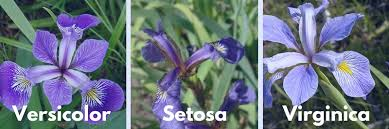

## Conjunto de datos

In [16]:
iris_data = pd.read_csv('iris.csv')
iris_data

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [17]:
iris_data.shape

(150, 5)

In [18]:
print('Flowers count: ', iris_data.shape[0])
print('Features count: ', iris_data.shape[1])

Flowers count:  150
Features count:  5


In [19]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Acerca de los datos:
+ El conjunto de datos se componen de 150 flores y 5 variables de medición para cada una
+ Cada característica tiene 150 instancias no nulas, por lo tanto, no existen valores nulos en los datos
+ Las primeras 4 características son variables numéricas continuas y la última(variety) es una variable nominal

## Estadísticas

In [20]:
iris_data.describe() 

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [21]:
iris_data[iris_data.duplicated()] # referenciar valores repetidos
# esta es repetida

,sepal.length,sepal.width,petal.length,petal.width,variety
142,5.8,2.7,5.1,1.9,Virginica


In [22]:
iris_data['variety'].value_counts() # cantidad de datos en data frame en funcion de variety

variety
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64

## Data distribution

c:\Users\Antonio\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Antonio\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Antonio\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Ant

<Figure size 1600x900 with 0 Axes>

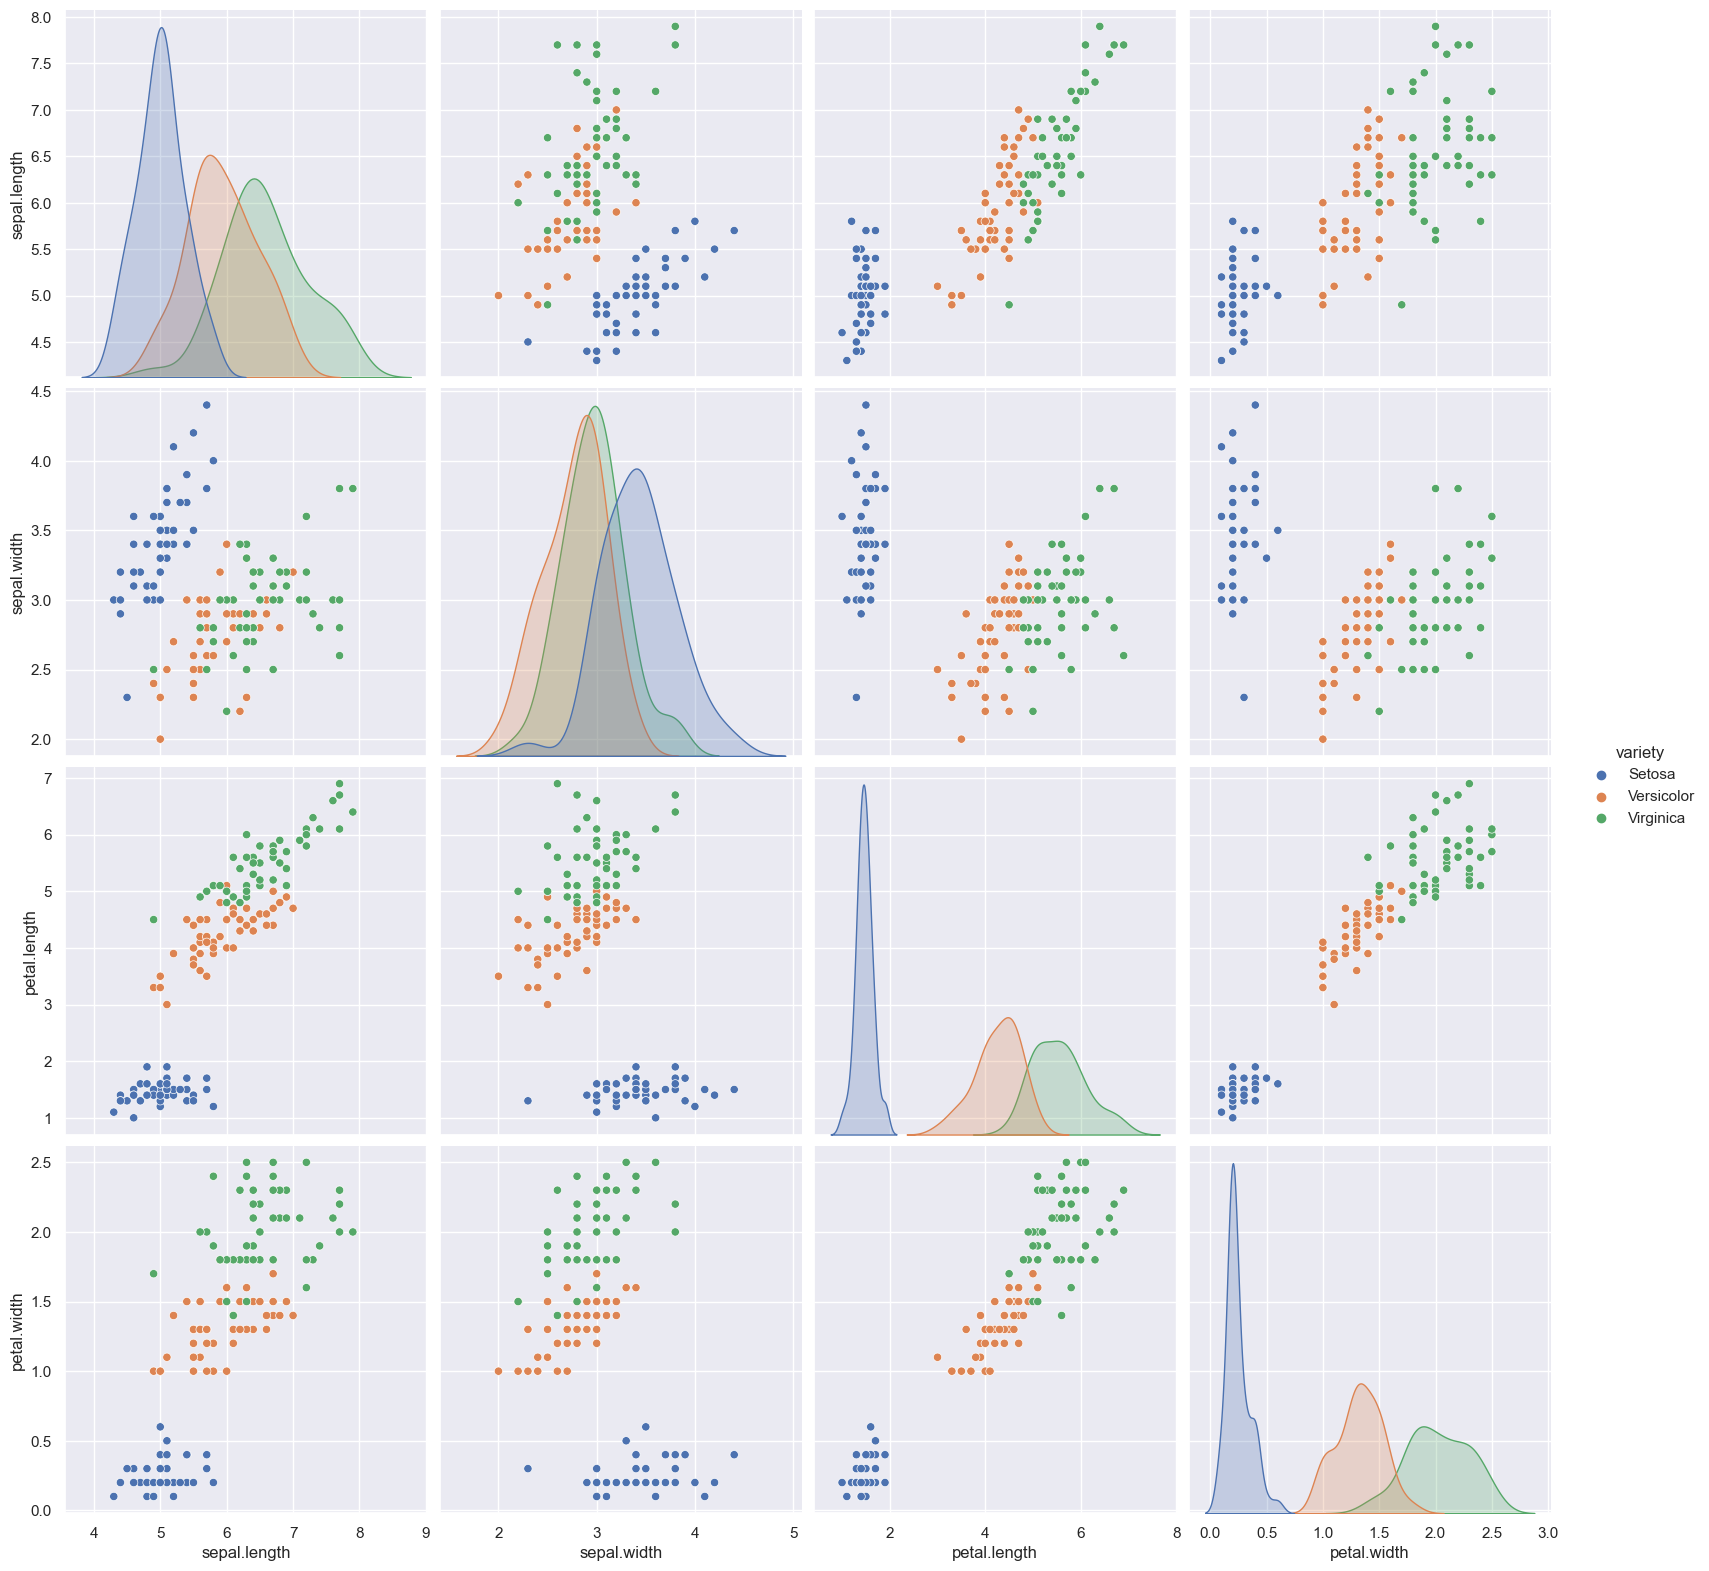

In [23]:
plt.figure(figsize=(16,9))
sns.pairplot(iris_data,hue='variety',height=4) # representa distintos valores independientes

+ Setosa tiene pétalos de largo y ancho bajos.
+ Versicolor tiene tanto la longitud como el ancho promedio de los pétalos.
+ El ancho del sépalo para setosa es alto y la longitud es baja.
+ Versicolor tiene valores promedio para las dimensiones del sépalo.
+ Virginica tiene un ancho pequeño pero una gran longitud del sépalo.

## Correlación de los datos

[]

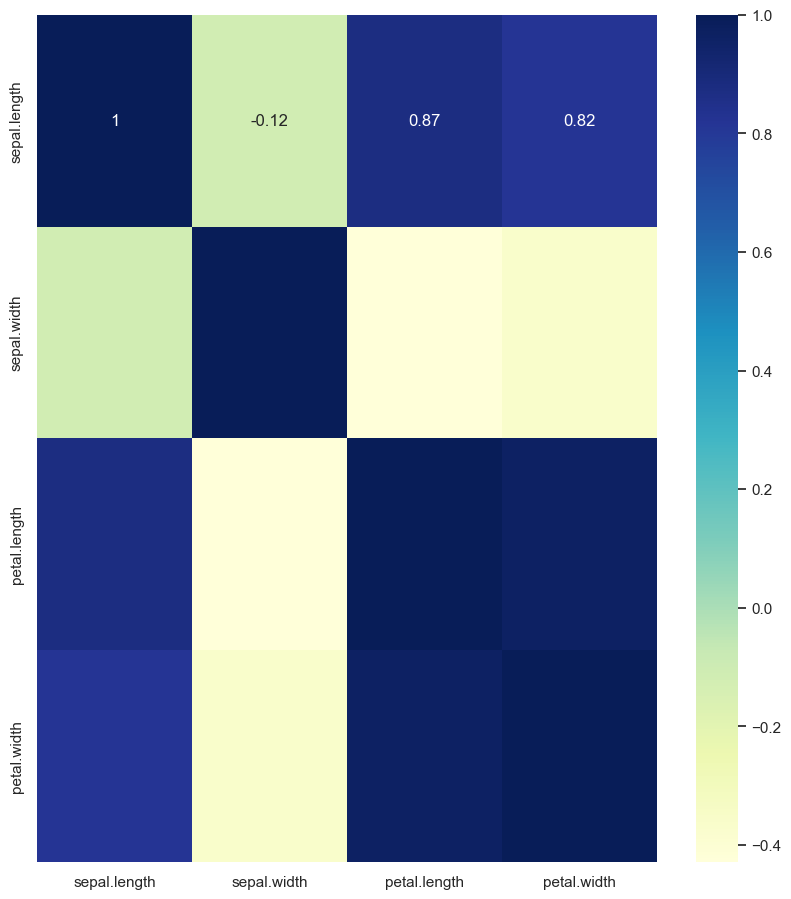

In [24]:
# Select only numeric columns for correlation
iris_data_numeric = iris_data.select_dtypes(include=[np.number])

plt.figure(figsize=(10,11)) # si dos variables se relacionan, son directa o inversamente proporcionales, se borran 
sns.heatmap(iris_data_numeric.corr(), cmap="YlGnBu",annot=True)
plt.plot()

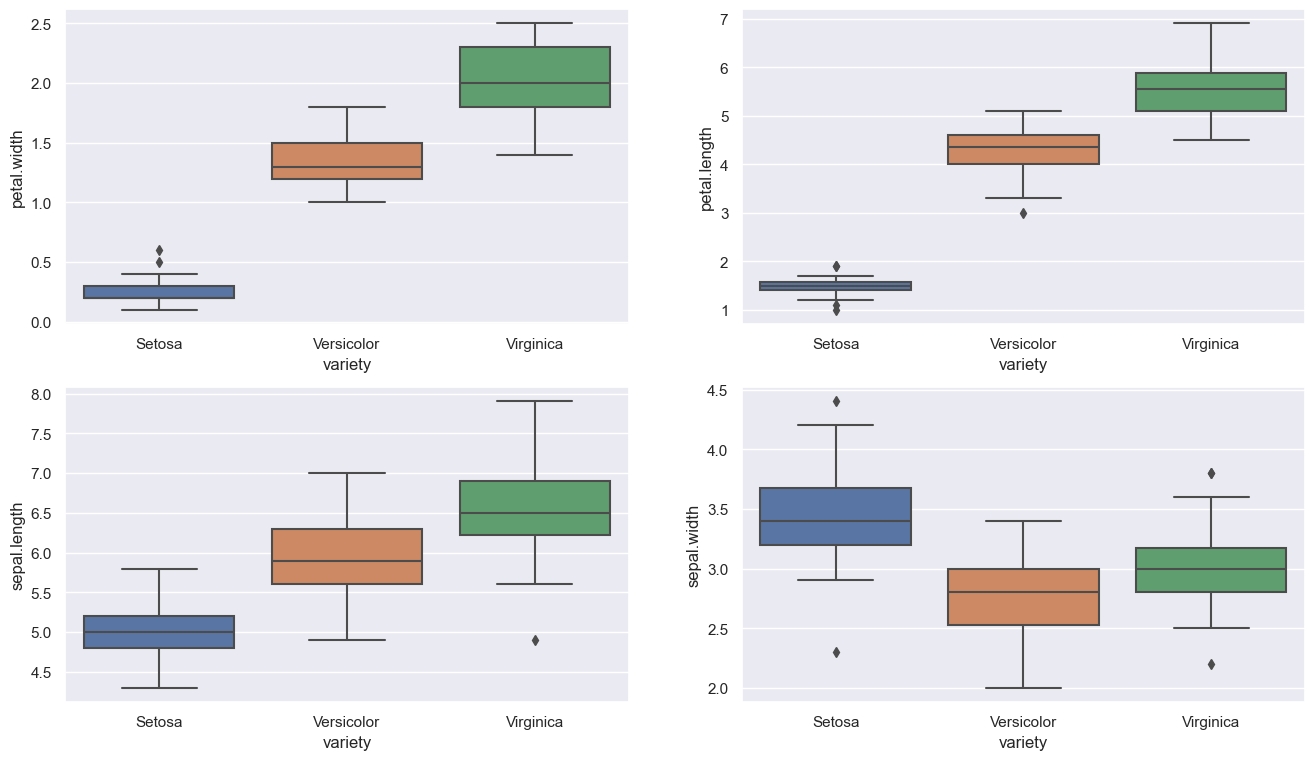

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.boxplot( y='petal.width', x= 'variety', data=iris_data, orient='v' , ax=axes[0, 0])
sns.boxplot( y='petal.length', x= 'variety', data=iris_data, orient='v' , ax=axes[0, 1])
sns.boxplot( y='sepal.length', x= 'variety', data=iris_data, orient='v' , ax=axes[1, 0])
sns.boxplot( y='sepal.width', x= 'variety', data=iris_data, orient='v' , ax=axes[1, 1])
plt.show()

# linea medio es la media, arriba es 75%, abajo es 25%, punticos fuera son valores extremos, que no estan representados por la distribucion total

<Axes: xlabel='sepal.width'>

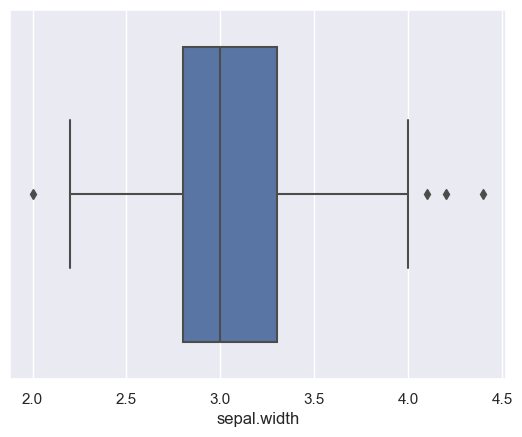

In [26]:
sns.boxplot(x='sepal.width', data=iris_data)

## Función de densidad de probabilidad(PDF) y histograma

c:\Users\Antonio\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Users\Antonio\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Antonio\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.

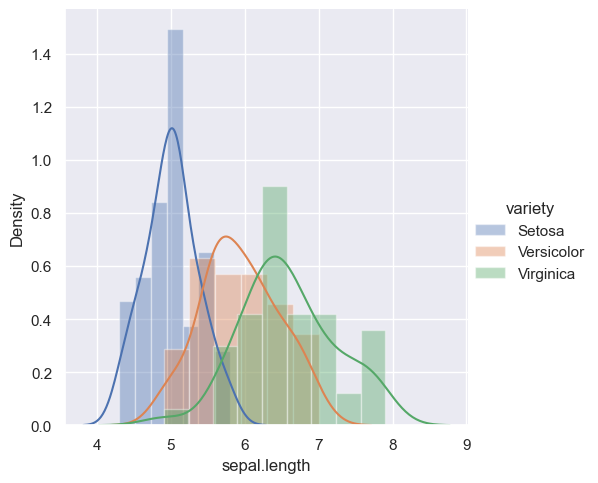

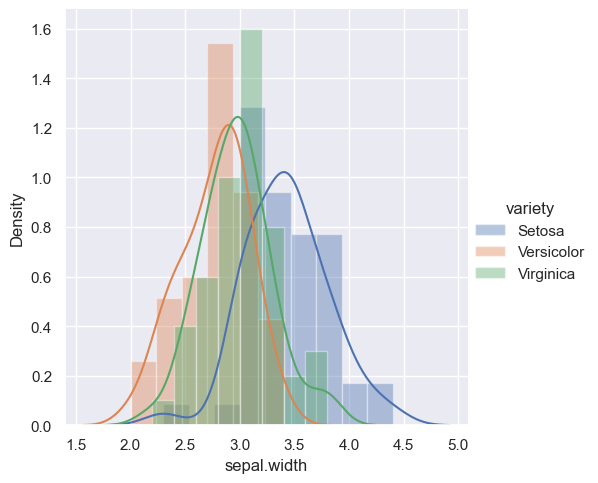

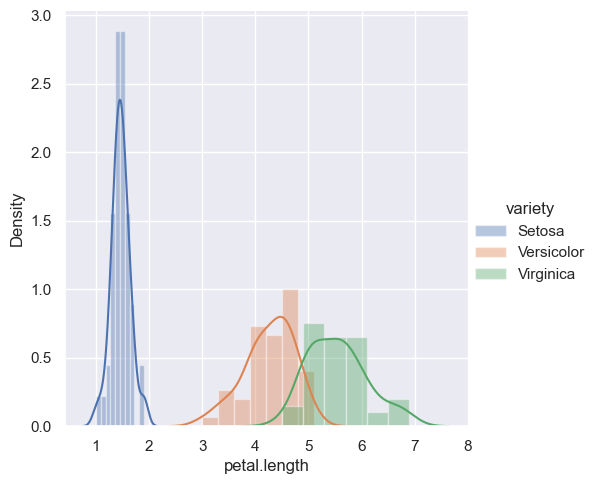

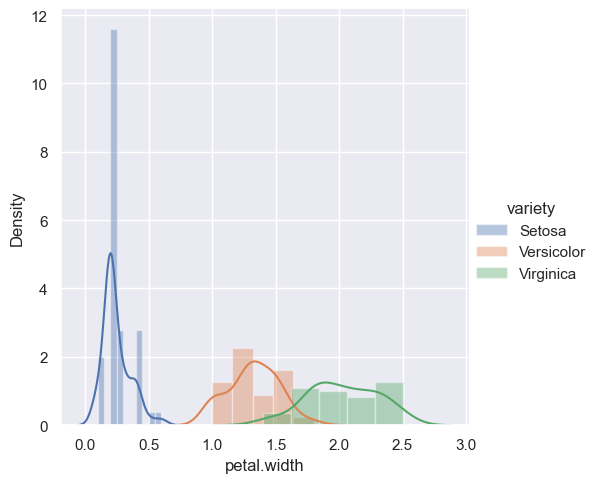

In [27]:
sns.FacetGrid(iris_data, hue="variety", height=5).map(sns.distplot, "sepal.length",).add_legend()

sns.FacetGrid(iris_data, hue="variety", height=5).map(sns.distplot, "sepal.width").add_legend()

sns.FacetGrid(iris_data, hue="variety", height=5).map(sns.distplot, "petal.length").add_legend()

sns.FacetGrid(iris_data, hue="variety", height=5).map(sns.distplot, "petal.width").add_legend()
plt.show()

# distribucion que hay, grafico de barras

+ La gráfica 1 muestra que hay una cantidad significativa de superposición entre las especies en la longitud del sépalo, por lo que no es una característica de clasificación efectiva.
+ El gráfico 2 muestra que existe una superposición aún mayor entre las especies en el ancho del sépalo, por lo que no es una característica de clasificación efectiva.
+ La parcela 3 muestra que la longitud de los pétalos es una buena característica de clasificación, ya que separa claramente las especies. La superposición es extremadamente menor (entre Versicolor y Virginica), Setosa está bien separada de los otros dos
+ Al igual que el gráfico 3, el gráfico 4 también muestra que el ancho de los pétalos es una buena característica de clasificación. La superposición es significativamente menor (entre Versicolor y Virginica), Setosa está bien separada de los otros dos

## Linear Classification
Sabiendo que con ancho y largo de petalos podemos realziar una clasificacion podemos establecer una relacion con ello

### The data

In [28]:
data = iris_data[iris_data.variety!='Virginica'][['sepal.length','sepal.width','variety']]
data

,sepal.length,sepal.width,variety
0,5.1,3.5,Setosa
1,4.9,3.0,Setosa
2,4.7,3.2,Setosa
3,4.6,3.1,Setosa
4,5.0,3.6,Setosa
...,...,...,...
95,5.7,3.0,Versicolor
96,5.7,2.9,Versicolor
97,6.2,2.9,Versicolor
98,5.1,2.5,Versicolor


In [29]:
from sklearn.utils import shuffle
data = shuffle(data) # cambiar de posicion aleatoriamente las filas, no es recomendado trabajar con data frames ordenados
data

,sepal.length,sepal.width,variety
23,5.1,3.3,Setosa
88,5.6,3.0,Versicolor
84,5.4,3.0,Versicolor
16,5.4,3.9,Setosa
4,5.0,3.6,Setosa
...,...,...,...
59,5.2,2.7,Versicolor
14,5.8,4.0,Setosa
9,4.9,3.1,Setosa
43,5.0,3.5,Setosa


In [43]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()# transformar la variable variety a valor numerico, trabajables
sepalLength = data['sepal.length']
sepalWidth =  data['sepal.width']

# escalar, restando su media
sepalLength -= np.mean(sepalLength)
sepalWidth -= np.mean(sepalWidth)

y = le.fit_transform(data['variety'])
y

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0])

### Train test split

In [31]:
#division en entrenamiento y prueba
train_sepalLength = sepalLength[:80]
train_sepalWidth = sepalWidth[:80]
train_y = y[:80]

test_sepalLength = sepalLength[80:]
test_sepalWidth = sepalWidth[80:]
test_y = y[80:]

Text(0, 0.5, 'sepal width')

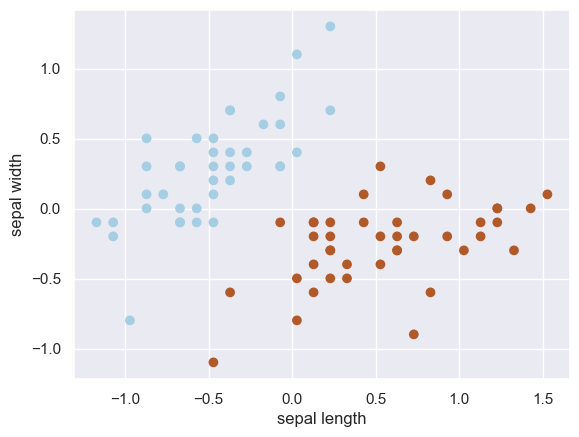

In [32]:
plt.scatter(train_sepalLength, 
            train_sepalWidth,
            c=train_y,
            cmap=plt.cm.Paired)
plt.xlabel("sepal length")
plt.ylabel("sepal width")

### The formulation

Lets take the classification problem as a linear function as

$y =x_0 w_0 + x_1 w_2$

In [33]:
# hacer una linea para separar los conjuntos

def plot_sep(w1, w2, color='green'):
    '''
    Plot decision boundary hypothesis 
      w1 * sepal_len + w2 * sepal_wid = 0
    in input space, highlighting the hyperplane
    '''
    plt.scatter(train_sepalLength, train_sepalWidth,c=train_y,cmap=plt.cm.Paired)
    plt.title("Separation in Input Space  [ w0={0} , w1={1} ]".format(w1,w2))
    plt.xlabel("sepal length")
    plt.ylabel("sepal width")
    if w2 != 0:
        m = -w1/w2
        t = 1 if w2 > 0 else -1
        plt.plot([-1.5,2.0], [-1.5*m, 2.0*m], '-y', color=color)
        plt.fill_between([-1.5, 2.0],[m*-1.5, m*2.0],[t*1.5, t*1.5],alpha=0.2,color=color)
    if w2 == 0: # decision boundary is vertical
        t = 1 if w1 > 0 else -1
        plt.plot([0, 0],[-1.5, 2.0],'-y',color=color)
        plt.fill_between([0, 2.0*t], [-1.5, -2.0],[1.5, 2],alpha=0.2,color=color)

$w_0 = 0$ y $w_1 = 1$

C:\Users\Antonio\AppData\Local\Temp\ipykernel_7884\2576791302.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-y" (-> color='y'). The keyword argument will take precedence.
  plt.plot([-1.5,2.0], [-1.5*m, 2.0*m], '-y', color=color)


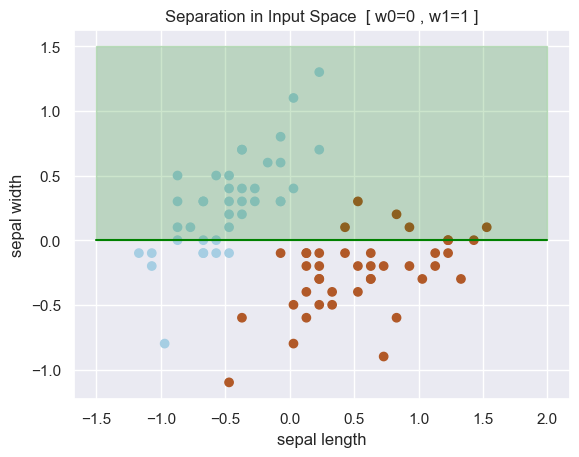

In [34]:
plot_sep(0, 1)

C:\Users\Antonio\AppData\Local\Temp\ipykernel_7884\2576791302.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-y" (-> color='y'). The keyword argument will take precedence.
  plt.plot([-1.5,2.0], [-1.5*m, 2.0*m], '-y', color=color)


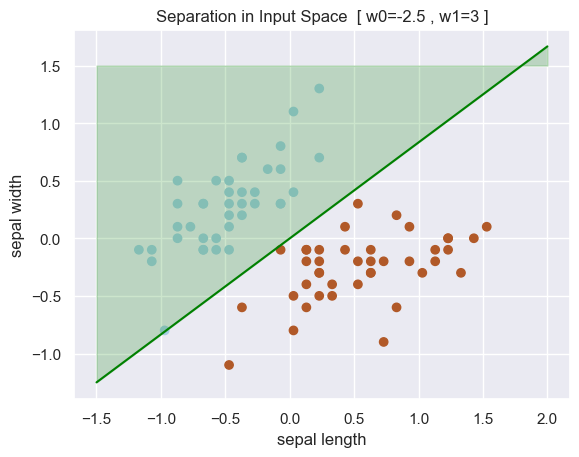

In [35]:
plot_sep(-2.5, 3)

In [36]:
import sklearn.linear_model
# creacion de modelo a partir de los vvalores dados
model = sklearn.linear_model.LogisticRegression(fit_intercept=False)
model.fit(np.stack([train_sepalLength, train_sepalWidth], axis=1), train_y)

LogisticRegression(fit_intercept=False)

In [37]:
w = model.coef_[0]
w

array([ 3.06312912, -2.48817251])

C:\Users\Antonio\AppData\Local\Temp\ipykernel_7884\2576791302.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-y" (-> color='y'). The keyword argument will take precedence.
  plt.plot([-1.5,2.0], [-1.5*m, 2.0*m], '-y', color=color)


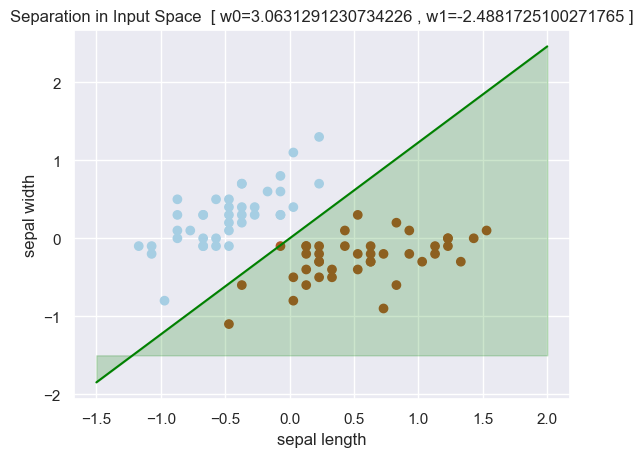

In [38]:
plot_sep(w[0], w[1])

In [39]:
y_hat = model.predict(np.stack([test_sepalLength, test_sepalWidth], axis=1))

In [40]:
test_y

array([0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0])

In [41]:
from sklearn import metrics

print("Precision, Recall, Confusion matrix, in training\n")

# Precision Recall scores
print(metrics.classification_report(test_y, y_hat, digits=3))

Precision, Recall, Confusion matrix, in training

              precision    recall  f1-score   support

           0      0.917     1.000     0.957        11
           1      1.000     0.889     0.941         9

    accuracy                          0.950        20
   macro avg      0.958     0.944     0.949        20
weighted avg      0.954     0.950     0.950        20



## Drug discovery

“Large, chemically diverse dataset of log P measurements for benchmarking studies” by Martel et al: https://doi.org/10.1016/j.ejps.2012.10.019.
+ Data available at https://ochem.eu/article/27772.

### Objective
+ Calculate features
+ Predict the water-octanol partition coefficient

In [42]:
drugs = pd.read_csv('drugs.csv')
drugs

FileNotFoundError: [Errno 2] No such file or directory: 'drugs.csv'

In [29]:
drugs = drugs[['EXTERNALID', 'SMILES', 'logPow', 'pH']]
drugs.rename(columns={'logPow': 'logP', 'EXTERNALID': 'ID'}, inplace=True)
drugs

<ipython-input-29-f97aa2f0c93b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drugs.rename(columns={'logPow': 'logP', 'EXTERNALID': 'ID'}, inplace=True)


,ID,SMILES,logP,pH
0,ZINC00036522,CC1=CC2=C(C=C1C)NC(=O)CC2C3=CC=CC=C3OC,4.17,5.0
1,ZINC00185379,COC1=CC=C2C(=C1)OC(CC2=O)(C(F)(F)F)O,2.79,5.0
2,ZINC12402487,CC1(OC(C(O1)C(=O)N)C(=O)N)C(C)(C)C,1.60,= 6.5
3,ZINC00055459,CCOC1=CC(=CC(=C1OCC)OCC)C2=NN=C(O2)C3=CC=CO3,3.96,= 10.5
4,ZINC00056871,CN(C)C1=CC=C(C=C1)C(=C)C2=CC=C(C=C2)N(C)C,5.30,= 7.3
...,...,...,...,...
702,ZINC03672564,OCC#CC(C1=CC=C(F)C=C1)(O)C2=CC=C(F)C=C2,3.61,5.0
703,ZINC03672819,CCN=C1N(C(=O)C(=CC2=CN(C=3C2=CC=CC3)CC(=O)NC4=...,5.80,10.0
704,ZINC03766933,C1=CC=C2C(=C1)N=C(N2CC(CO)O)SCCSC3=NC4=CC=CC=C...,3.29,= 10.5
705,ZINC00404391,CCOC(=O)C1=CC=C(C=C1)C#N,1.87,5.0


In [30]:
drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      707 non-null    object 
 1   SMILES  707 non-null    object 
 2   logP    707 non-null    float64
 3   pH      707 non-null    object 
dtypes: float64(1), object(3)
memory usage: 22.2+ KB


In [31]:
drugs['pH'] = pd.to_numeric(drugs['pH'].map(lambda x: x.lstrip('=').rstrip('=')))

<ipython-input-31-764068d5daa5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drugs['pH'] = pd.to_numeric(drugs['pH'].map(lambda x: x.lstrip('=').rstrip('=')))


In [32]:
drugs.describe()

,logP,pH
count,707.000000,707.000000
mean,4.188713,6.438614
std,1.179046,2.292337
min,0.300000,2.000000
25%,3.460000,5.000000
50%,4.330000,5.000000
75%,4.980000,7.300000
max,6.960000,10.500000


c:\users\ale\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\ale\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='pH', ylabel='Density'>

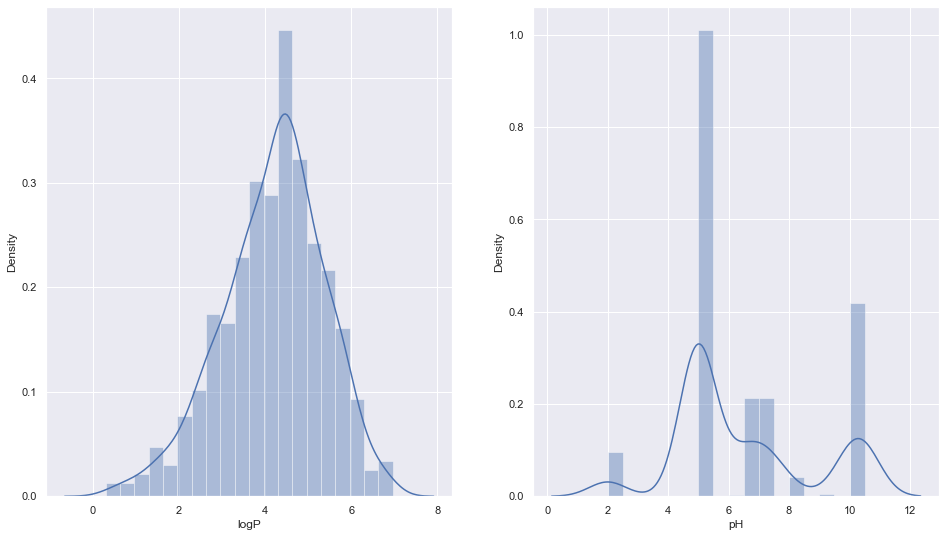

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(16,9))
sns.distplot(drugs['logP'], ax=axes[0])
sns.distplot(drugs['pH'], ax=axes[1])

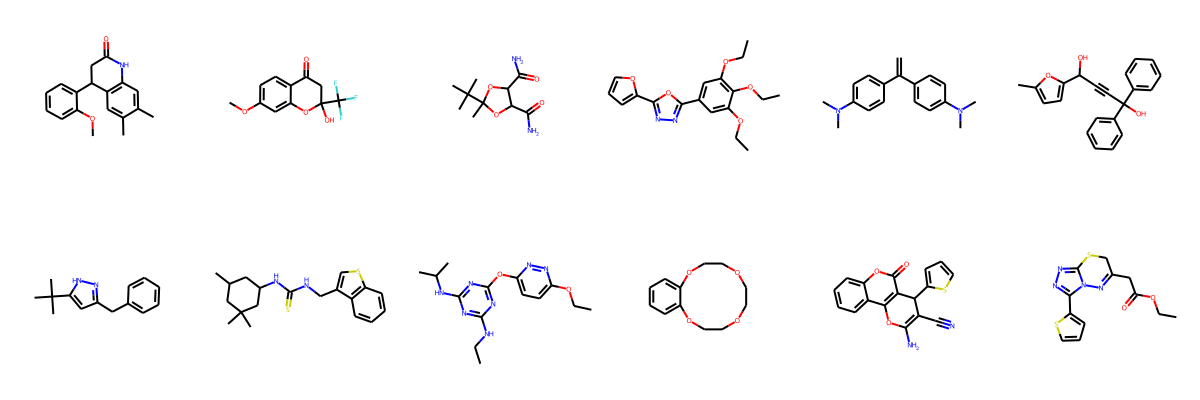

In [34]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw


molecules = drugs.SMILES.apply(Chem.MolFromSmiles)
Draw.MolsToGridImage(molecules[:12],molsPerRow=6)

In [35]:
drugs

,ID,SMILES,logP,pH
0,ZINC00036522,CC1=CC2=C(C=C1C)NC(=O)CC2C3=CC=CC=C3OC,4.17,5.0
1,ZINC00185379,COC1=CC=C2C(=C1)OC(CC2=O)(C(F)(F)F)O,2.79,5.0
2,ZINC12402487,CC1(OC(C(O1)C(=O)N)C(=O)N)C(C)(C)C,1.60,6.5
3,ZINC00055459,CCOC1=CC(=CC(=C1OCC)OCC)C2=NN=C(O2)C3=CC=CO3,3.96,10.5
4,ZINC00056871,CN(C)C1=CC=C(C=C1)C(=C)C2=CC=C(C=C2)N(C)C,5.30,7.3
...,...,...,...,...
702,ZINC03672564,OCC#CC(C1=CC=C(F)C=C1)(O)C2=CC=C(F)C=C2,3.61,5.0
703,ZINC03672819,CCN=C1N(C(=O)C(=CC2=CN(C=3C2=CC=CC3)CC(=O)NC4=...,5.80,10.0
704,ZINC03766933,C1=CC=C2C(=C1)N=C(N2CC(CO)O)SCCSC3=NC4=CC=CC=C...,3.29,10.5
705,ZINC00404391,CCOC(=O)C1=CC=C(C=C1)C#N,1.87,5.0


### Calculate descriptors

In [36]:

from rdkit.Chem import Descriptors


drugs.loc[:, 'MolLogP'] = molecules.apply(Descriptors.MolLogP)
drugs.loc[:, 'HeavyAtomCount'] = molecules.apply(Descriptors.HeavyAtomCount)
drugs.loc[:, 'NumHAcceptors'] = molecules.apply(Descriptors.NumHAcceptors)
drugs.loc[:, 'NumHeteroatoms'] = molecules.apply(Descriptors.NumHeteroatoms)
drugs.loc[:, 'NumHDonors'] = molecules.apply(Descriptors.NumHDonors)
drugs.loc[:, 'MolWt'] = molecules.apply(Descriptors.MolWt)
drugs.loc[:, 'NumRotatableBonds'] = molecules.apply(Descriptors.NumRotatableBonds)
drugs.loc[:, 'RingCount'] = molecules.apply(Descriptors.RingCount)
drugs.loc[:, 'HallKierAlpha'] = molecules.apply(Descriptors.HallKierAlpha)
drugs.loc[:, 'NumValenceElectrons'] = molecules.apply(Descriptors.NumValenceElectrons)
drugs.loc[:, 'NumSaturatedRings'] = molecules.apply(Descriptors.NumSaturatedRings)
drugs.loc[:, 'NumAliphaticRings'] = molecules.apply(Descriptors.NumAliphaticRings)
drugs.loc[:, 'NumAromaticRings'] = molecules.apply(Descriptors.NumAromaticRings)

drugs

<ipython-input-36-c93fa5d4bc65>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drugs.loc[:, 'MolLogP'] = molecules.apply(Descriptors.MolLogP)
<ipython-input-36-c93fa5d4bc65>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drugs.loc[:, 'HeavyAtomCount'] = molecules.apply(Descriptors.HeavyAtomCount)
<ipython-input-36-c93fa5d4bc65>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

,ID,SMILES,logP,pH,MolLogP,HeavyAtomCount,NumHAcceptors,NumHeteroatoms,NumHDonors,MolWt,NumRotatableBonds,RingCount,HallKierAlpha,NumValenceElectrons,NumSaturatedRings,NumAliphaticRings,NumAromaticRings
0,ZINC00036522,CC1=CC2=C(C=C1C)NC(=O)CC2C3=CC=CC=C3OC,4.17,5.0,3.78614,21,2,3,1,281.355,2,3,-2.29,108,0,1,2
1,ZINC00185379,COC1=CC=C2C(=C1)OC(CC2=O)(C(F)(F)F)O,2.79,5.0,1.91130,18,4,7,1,262.183,1,2,-1.76,98,0,1,1
2,ZINC12402487,CC1(OC(C(O1)C(=O)N)C(=O)N)C(C)(C)C,1.60,6.5,-0.49670,16,4,6,2,230.264,2,1,-1.14,92,1,1,0
3,ZINC00055459,CCOC1=CC(=CC(=C1OCC)OCC)C2=NN=C(O2)C3=CC=CO3,3.96,10.5,4.19270,25,7,7,0,344.367,8,3,-2.96,132,0,0,3
4,ZINC00056871,CN(C)C1=CC=C(C=C1)C(=C)C2=CC=C(C=C2)N(C)C,5.30,7.3,3.88010,20,2,2,0,266.388,4,2,-2.22,104,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,ZINC03672564,OCC#CC(C1=CC=C(F)C=C1)(O)C2=CC=C(F)C=C2,3.61,5.0,2.19640,20,2,4,2,274.266,2,2,-2.22,102,0,0,2
703,ZINC03672819,CCN=C1N(C(=O)C(=CC2=CN(C=3C2=CC=CC3)CC(=O)NC4=...,5.80,10.0,4.90052,32,5,7,1,446.576,6,4,-3.32,164,1,1,3
704,ZINC03766933,C1=CC=C2C(=C1)N=C(N2CC(CO)O)SCCSC3=NC4=CC=CC=C...,3.29,10.5,1.97680,32,10,10,4,474.608,11,4,-2.08,170,0,0,4
705,ZINC00404391,CCOC(=O)C1=CC=C(C=C1)C#N,1.87,5.0,1.73498,13,3,3,0,175.187,2,1,-1.82,66,0,0,1


### Correlation Analysis

[]

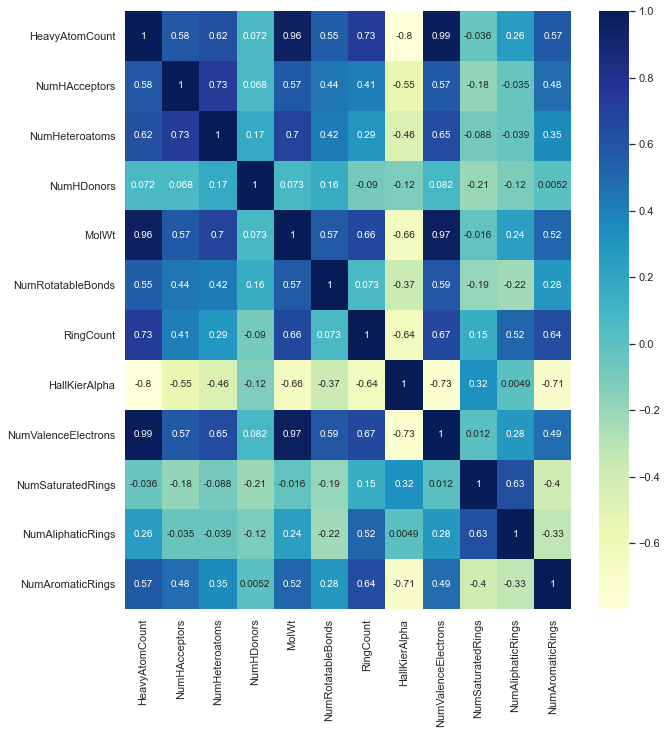

In [37]:
plt.figure(figsize=(10,11))
sns.heatmap(drugs[drugs.columns[5:]].corr(), cmap="YlGnBu",annot=True)
plt.plot()

### lopP experimental vs logP calculado por rdkit

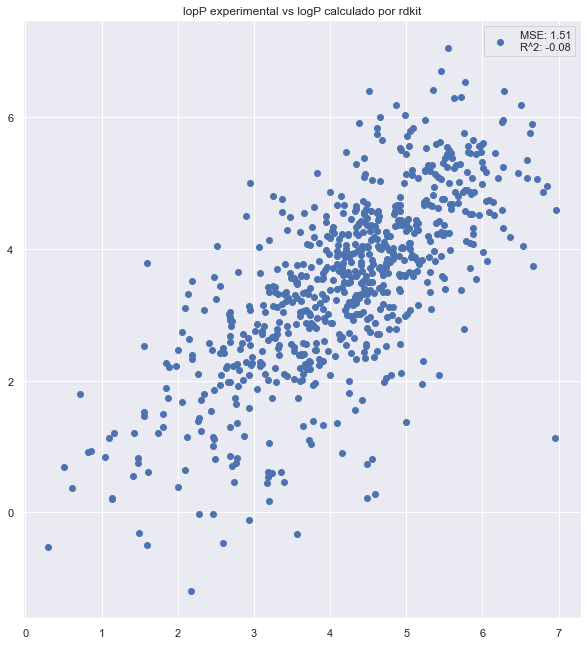

In [38]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


plt.figure(figsize=(10,11))
r2 = r2_score(drugs.logP, drugs.MolLogP)
mse = mean_squared_error(drugs.logP, drugs.MolLogP)
plt.scatter(drugs.logP, drugs.MolLogP,
            label = "MSE: {:.2f}\nR^2: {:.2f}".format(mse, r2))
plt.title("lopP experimental vs logP calculado por rdkit")
plt.legend()
plt.show()



### Support Vector Regressor

In [39]:
def make_SVR(X_train, X_test, y_train, y_test,C=None,title='Regression'):
    from sklearn.svm import SVR
    
    model = SVR(gamma='auto') if C == None else SVR(C=C,gamma='auto')
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    plt.figure(figsize=(10,11))
    plt.title(title)
    plt.scatter(y_test, y_pred, label = "MSE: {:.2f}\nR^2: {:.2f}".format(mse, r2))
    plt.legend()
    plt.show()


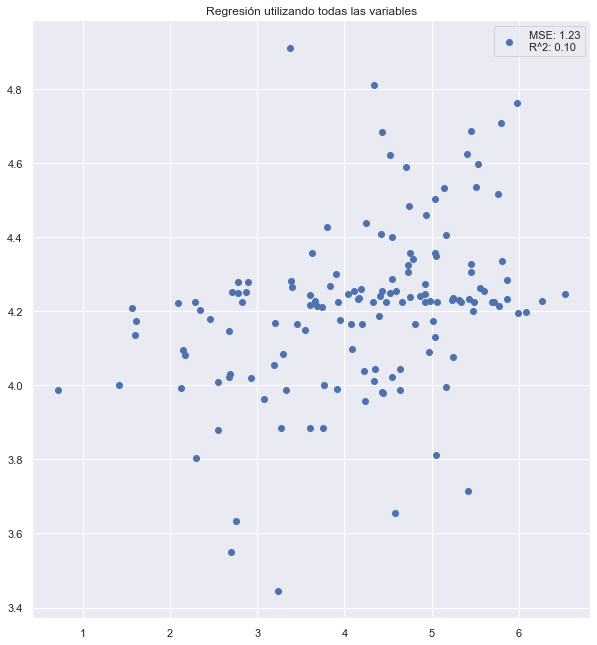

In [40]:
from sklearn.model_selection import train_test_split

X = drugs.iloc[:, 5:]
y = drugs.logP

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


make_SVR(X_train, X_test, y_train, y_test,title=f"Regresión utilizando todas las variables")



### Teniendo en cuenta un umbral de 0.95 de correlación para cada par de variables

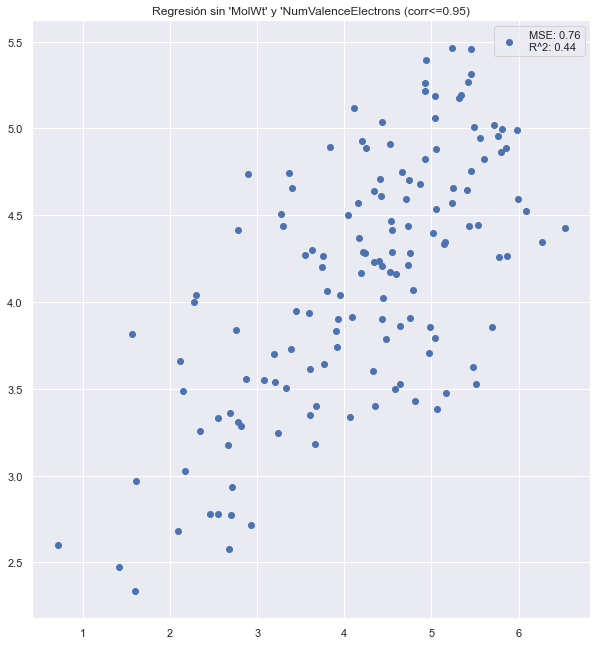

In [41]:
corr_treshold = 0.95

corr_matrix = drugs[drugs.columns[5:]].corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))
to_drop = [column for column in upper.columns if any(upper[column] > corr_treshold)]


X = drugs.drop(columns=to_drop).iloc[:, 5:]
y = drugs.drop(columns=to_drop).logP

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


make_SVR(X_train, X_test, y_train, y_test,title=f"Regresión sin 'MolWt' y 'NumValenceElectrons (corr<={corr_treshold})")




## Perceptrón Multicapa(MLP)

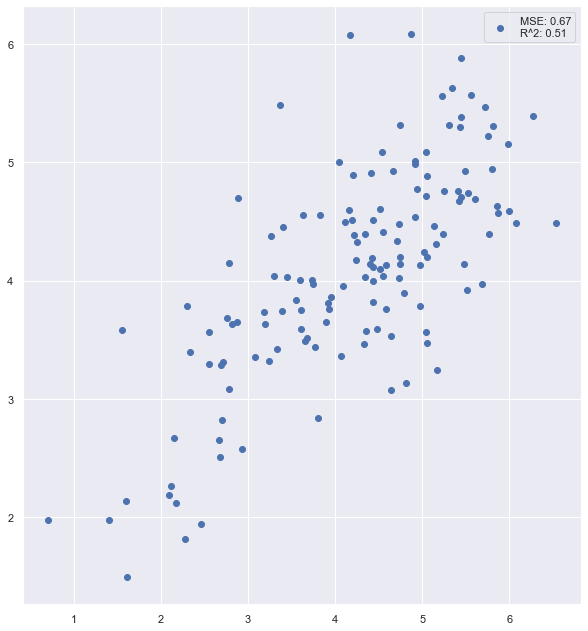

In [42]:
from sklearn.neural_network import MLPRegressor

corr_treshold = 0.8

corr_matrix = drugs[drugs.columns[5:]].corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))
to_drop = [column for column in upper.columns if any(upper[column] > corr_treshold)]


X = drugs.drop(columns=to_drop).iloc[:, 5:]
y = drugs.drop(columns=to_drop).logP

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = MLPRegressor(random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

plt.figure(figsize=(10,11))
plt.scatter(y_test, y_pred, label = "MSE: {:.2f}\nR^2: {:.2f}".format(mse, r2))
plt.legend()
plt.show()